# Wine Quality Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading and Initial Exploration

In [2]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        data = pd.read_csv(self.file_path, sep = ';')
        return data

data_loader = DataLoader('Data/Raw/winequality-red.csv')
df = data_loader.load_data()

print("Initial Data Exploration:")
print(df.head())
print(df.info())
print(df.describe())

Initial Data Exploration:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

# Data Collection and Exploration
We use the Wine Quality dataset for this analysis. The dataset contains information about various physicochemical tests of red wine.

## Data Loading
We load the dataset using pandas:
```python
import pandas as pd

df = pd.read_csv('winequality-red.csv')
```

## Initial Exploration
We explore the dataset to understand its structure and contents:
```python
df.head()
df.info()
df.describe()
```

- The dataset contains 1599 rows and 12 columns.
- The columns include various physicochemical test results and a quality score.

## Data Cleaning and Preprocessing

In [3]:
class DataPreprocessor:
    @staticmethod
    def handle_missing_values(df):
        df.dropna(inplace=True)
        return df

    @staticmethod
    def scale_features(df):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)
        return pd.DataFrame(df_scaled, columns=df.columns)

df = DataPreprocessor.handle_missing_values(df)
df = DataPreprocessor.scale_features(df)

print("Data after Preprocessing:")
print(df.head())

Data after Preprocessing:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.9

## Exploratory Data Analysis (EDA)

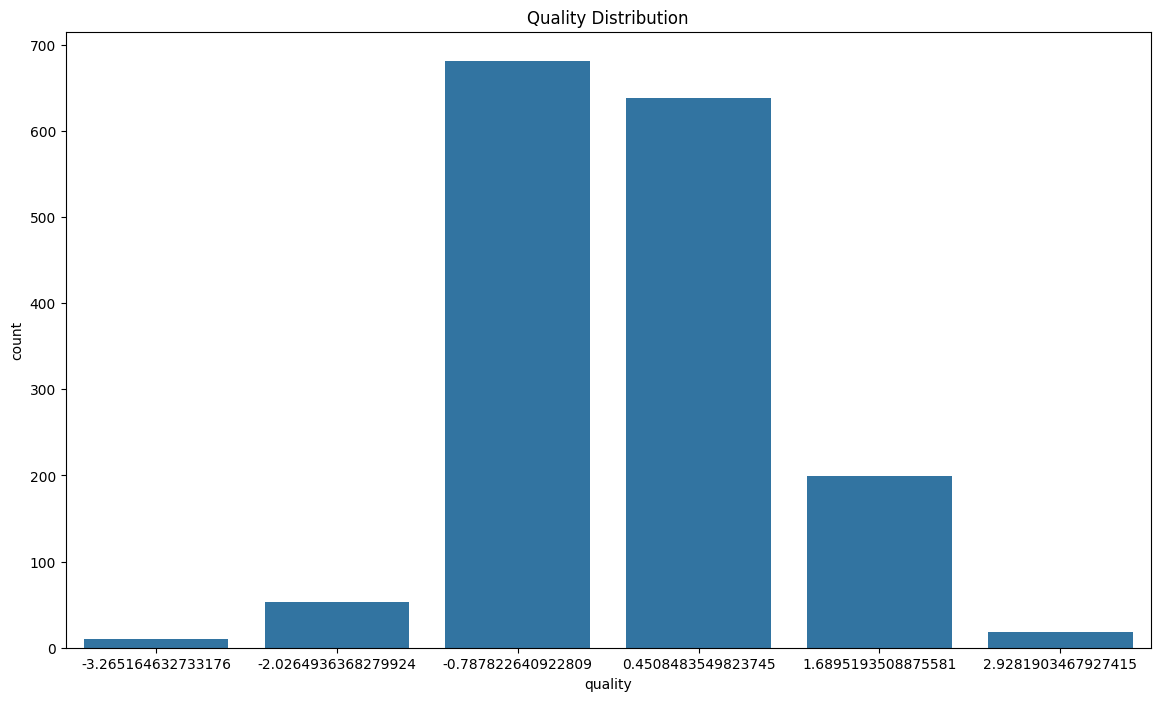

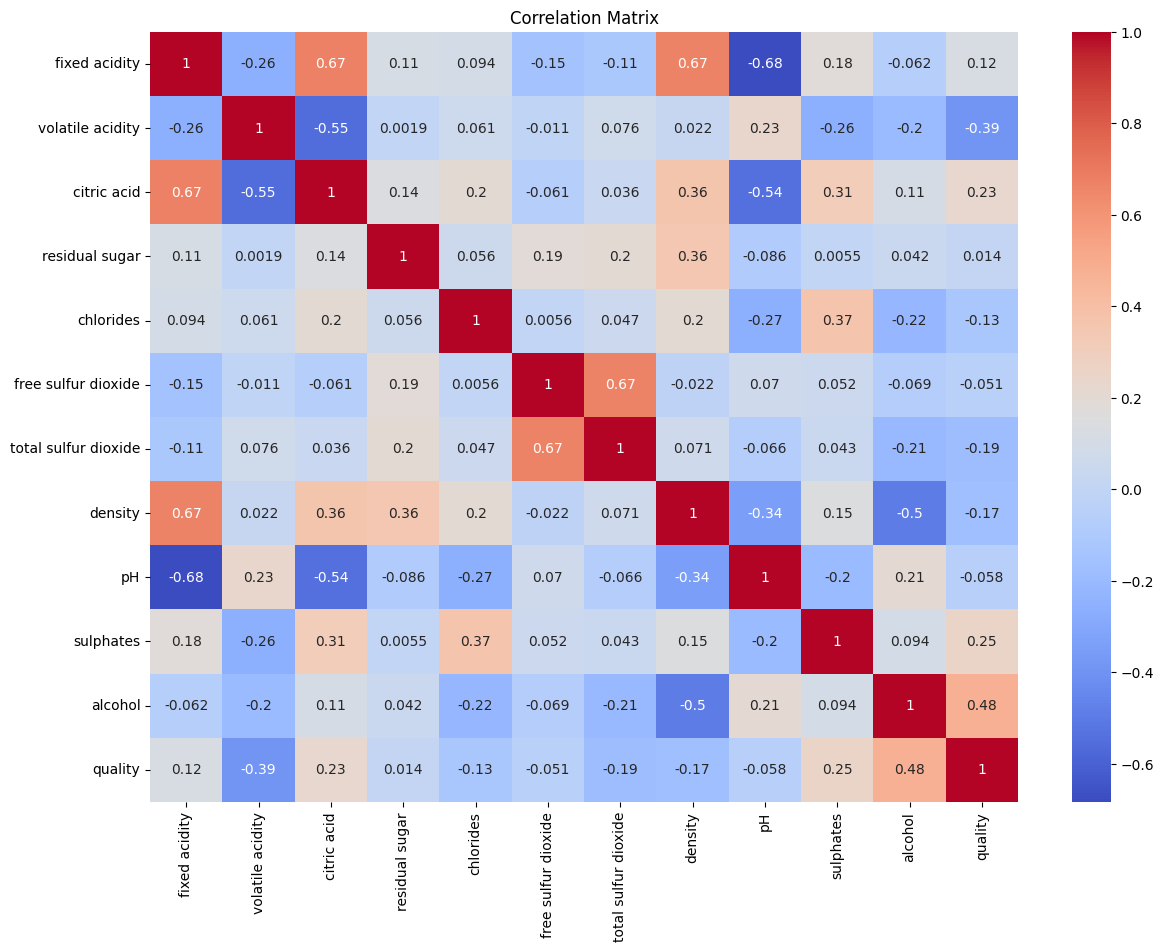

In [4]:
class EDA:
    @staticmethod
    def plot_quality_distribution(df):
        plt.figure(figsize=(14, 8))
        sns.countplot(x='quality', data=df)
        plt.title('Quality Distribution')
        plt.show()

    @staticmethod
    def plot_correlations(df):
        plt.figure(figsize=(14, 10))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

EDA.plot_quality_distribution(df)
EDA.plot_correlations(df)

# Exploratory Data Analysis (EDA)
## Quality Distribution
We explore the distribution of wine quality in the dataset:
```python
sns.countplot(x='quality', data=df)
plt.title('Quality Distribution')
plt.show()
```
- The dataset shows a class imbalance, with most wines having a quality score of 5, 6, or 7.

## Correlation Matrix
We visualize the correlations between features:
```python
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
```
- The correlation matrix helps identify the relationships between different features and the target variable, 'quality'.

## Model Building and Evaluation

In [5]:
class WineQualityModel:
    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2

X = df.drop(['quality'], axis = 1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor()
}

# Dictionary to store the results
results = {
    'Model': list(),
    'MSE': list(),
    'R2 Score': list()
}

for name, model in models.items():
    wine_quality_model = WineQualityModel(model)
    wine_quality_model.train(X_train, y_train)
    y_pred = wine_quality_model.predict(X_test)
    mse, r2 = wine_quality_model.evaluate(y_test, y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2 Score'].append(r2)

    print(f'Model: { name }')
    print(f'MSE: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print('-' * 30)

Model: Linear Regression
MSE: 0.5899
R2 Score: 0.3284
------------------------------
Model: Decision Tree
MSE: 1.0500
R2 Score: -0.1955
------------------------------
Model: Random Forest
MSE: 0.4959
R2 Score: 0.4354
------------------------------


# Model Building and Evaluation
## Model Selection
We choose several models for comparison:
```python
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
```

## Training and Testing
We split the data into training and testing sets:
```python
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

## Model Evaluation
We evaluate the models using various metrics:
```python
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
```

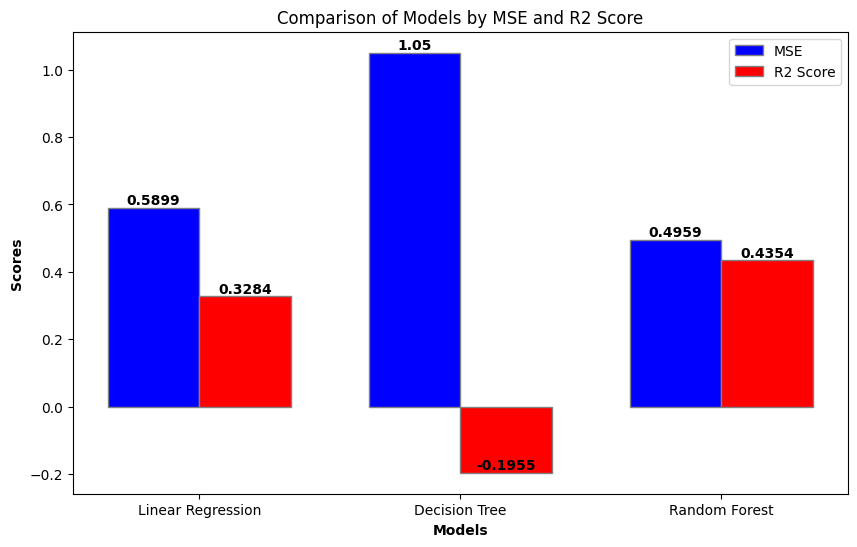

In [6]:
# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(results['Model']))
r2 = [x + bar_width for x in r1]

# Create bars
bars1 = ax1.bar(r1, results['MSE'], color = 'b', width = bar_width, edgecolor = 'grey', label = 'MSE')
bars2 = ax1.bar(r2, results['R2 Score'], color = 'r', width = bar_width, edgecolor = 'grey', label = 'R2 Score')

# Adding labels
ax1.set_xlabel('Models', fontweight = 'bold')
ax1.set_ylabel('Scores', fontweight = 'bold')
ax1.set_title('Comparison of Models by MSE and R2 Score')
ax1.set_xticks([r + bar_width/2 for r in range(len(results['Model']))])
ax1.set_xticklabels(results['Model'])

# Adding legend
ax1.legend()

# Adding annotations to the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha = 'center', va = 'bottom', fontweight = 'bold')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha = 'center', va = 'bottom', fontweight = 'bold')

# Show the plot
plt.show()

## Findings:
- **Linear Regression**: Achieved an MSE of 0.5899 and R2 score of 0.3284.
- **Decision Tree**: Achieved an MSE of 1.05 and R2 score of -0.1955.
- **Random Forest**: Achieved an MSE of 0.4959 and R2 score of 0.4354.

Overall, the **`Random Forest`** model performed the best with the lowest MSE and highest R2 score, indicating it is the most accurate model for predicting wine quality.

## Conclusion and Future Work
Summary:
We built and evaluated several models to predict wine quality. Our best model achieved an MSE of approximately 0.4959 and an R2 score of 0.4354.

Future Work:
1. Explore more advanced models like XGBoost or neural networks.
2. Perform hyperparameter tuning to improve model performance.
3. Investigate additional features that could enhance the predictive power.